In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datadir = '/nobackup/jakravit/data/HE60/batch_data/'
batch_name = 'case1V5'
inputs = pd.read_csv(datadir + '{}_inputs.csv'.format(batch_name), index_col=0)
outputs = pd.read_csv(datadir + '{}_outputs.csv'.format(batch_name), index_col=0)

In [2]:
noglintidx = inputs.index[inputs['Sg_included'] == 0]
noBridx = inputs.index[inputs['Br_included'] == 0]

cleanRrsIdx = inputs.index[(inputs['Sg_included'] == 0) & (inputs['Br_included'] == 0)]
glintIdx = inputs.index[(inputs['Sg_included'] == 1) & (inputs['Br_included'] == 0)]
brIdx = inputs.index[(inputs['Sg_included'] == 0) & (inputs['Br_included'] == 1)]
brGlintIdx = inputs.index[(inputs['Sg_included'] == 1) & (inputs['Br_included'] == 1)]

rrs = outputs.filter(regex='^rrs')
rrs.columns = np.arange(400, 902.5, 2.5)

<AxesSubplot:title={'center':'Rrs with Glint and bottom reflectance'}>

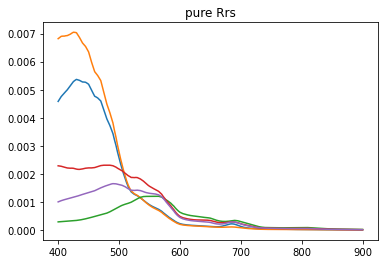

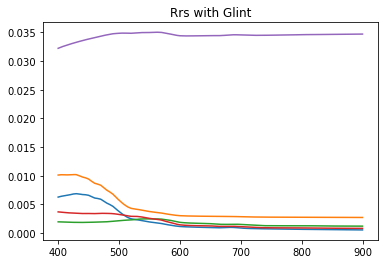

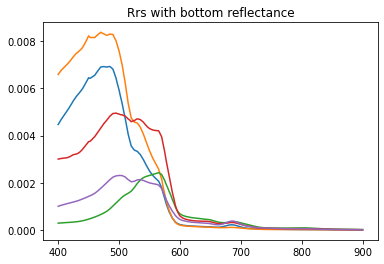

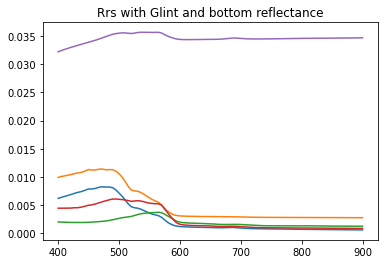

In [3]:
# pure rrs - no glint, no rrs
rrs.loc[cleanRrsIdx,:].T.plot(legend=False, title='pure Rrs')

# rrs with sunglint and no bottom reflectance
rrs.loc[glintIdx,:].T.plot(legend=False, title='Rrs with Glint')

# rrs with bottom reflectance and no glint
rrs.loc[brIdx,:].T.plot(legend=False, title='Rrs with bottom reflectance')

# rrs with bottom reflectance and glint
rrs.loc[brGlintIdx,:].T.plot(legend=False, title='Rrs with Glint and bottom reflectance')

In [7]:
benthic = inputs.filter(regex='^benthic_tot')

<AxesSubplot:>

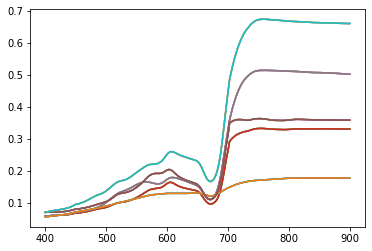

In [10]:
benthic.columns = np.arange(400, 902.5, 2.5)
benthic.T.plot(legend=False)